https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/plot_example.py

Loading data...
Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001759 seconds.
You can set `force_col_wise=true` to remove the overhead.
[10]	training's l1: 0.457448	training's l2: 0.217995	valid_1's l1: 0.456464	valid_1's l2: 0.21641
[20]	training's l1: 0.436869	training's l2: 0.205099	valid_1's l1: 0.434057	valid_1's l2: 0.201616
[30]	training's l1: 0.421302	training's l2: 0.197421	valid_1's l1: 0.417019	valid_1's l2: 0.192514
[40]	training's l1: 0.411107	training's l2: 0.192856	valid_1's l1: 0.406303	valid_1's l2: 0.187258
[50]	training's l1: 0.403695	training's l2: 0.189593	valid_1's l1: 0.398997	valid_1's l2: 0.183688
[60]	training's l1: 0.398704	training's l2: 0.187043	valid_1's l1: 0.393977	valid_1's l2: 0.181009
[70]	training's l1: 0.394876	training's l2: 0.184982	valid_1's l1: 0.389805	valid_1's l2: 0.178803
[80]	training's l1: 0.391147	training's l2: 0.1828	valid_1's l1: 0.386476	valid_1's l2: 0.176799
[90]	trai

C:\Users\In-Ho Lee\.conda\envs\testAI\lib\site-packages\lightgbm\basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [21]
  warnings.warn('categorical_feature in Dataset is overridden.\n'
C:\Users\In-Ho Lee\.conda\envs\testAI\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\In-Ho Lee\.conda\envs\testAI\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


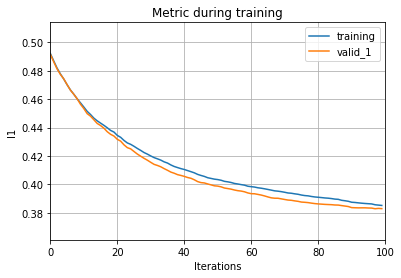

Plotting feature importances...


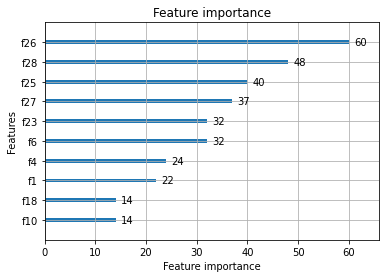

Plotting split value histogram...


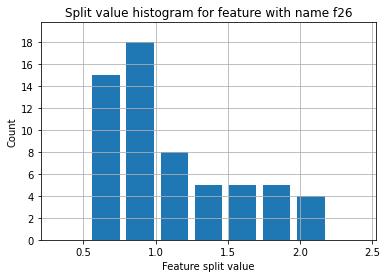

Plotting 54th tree...


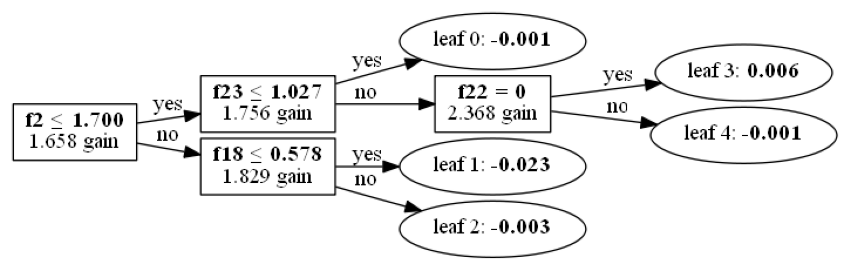

Plotting 54th tree with graphviz...


'Tree54.gv.pdf'

In [1]:
# coding: utf-8
import lightgbm as lgb
import pandas as pd

if lgb.compat.MATPLOTLIB_INSTALLED:
    import matplotlib.pyplot as plt
else:
    raise ImportError('You need to install matplotlib for plot_example.py.')

print('Loading data...')
# load or create your dataset
df_train = pd.read_csv('C:/Users/In-Ho Lee/testAI/regression/regression.train', header=None, sep='\t')
df_test = pd.read_csv('C:/Users/In-Ho Lee/testAI/regression/regression.test', header=None, sep='\t')

y_train = df_train[0]
y_test = df_test[0]
X_train = df_train.drop(0, axis=1)
X_test = df_test.drop(0, axis=1)

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'num_leaves': 5,
    'metric': ('l1', 'l2'),
    'verbose': 0
}

evals_result = {}  # to record eval results for plotting

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=[lgb_train, lgb_test],
                feature_name=['f' + str(i + 1) for i in range(X_train.shape[-1])],
                categorical_feature=[21],
                evals_result=evals_result,
                verbose_eval=10)

print('Plotting metrics recorded during training...')
ax = lgb.plot_metric(evals_result, metric='l1')
plt.show()

print('Plotting feature importances...')
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

print('Plotting split value histogram...')
ax = lgb.plot_split_value_histogram(gbm, feature='f26', bins='auto')
plt.show()

print('Plotting 54th tree...')  # one tree use categorical feature to split
ax = lgb.plot_tree(gbm, tree_index=53, figsize=(15, 15), show_info=['split_gain'])
plt.show()

print('Plotting 54th tree with graphviz...')
graph = lgb.create_tree_digraph(gbm, tree_index=53, name='Tree54')
graph.render(view=True)

https://raw.githubusercontent.com/microsoft/LightGBM/master/examples/python-guide/simple_example.py

In [2]:
# coding: utf-8
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error

print('Loading data...')
# load or create your dataset
df_train = pd.read_csv('C:/Users/In-Ho Lee/testAI/regression/regression.train', header=None, sep='\t')
df_test = pd.read_csv('C:/Users/In-Ho Lee/testAI/regression/regression.test', header=None, sep='\t')

y_train = df_train[0]
y_test = df_test[0]
X_train = df_train.drop(0, axis=1)
X_test = df_test.drop(0, axis=1)

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

Loading data...
Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l1: 0.493018	valid_0's l2: 0.244076
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.489056	valid_0's l2: 0.240297
[3]	valid_0's l1: 0.484089	valid_0's l2: 0.235733
[4]	valid_0's l1: 0.479088	valid_0's l2: 0.231352
[5]	valid_0's l1: 0.476159	valid_0's l2: 0.228939
[6]	valid_0's l1: 0.472664	valid_0's l2: 0.22593
[7]	valid_0's l1: 0.468425	valid_0's l2: 0.222515
[8]	valid_0's l1: 0.464594	valid_0's l2: 0.219569
[9]	valid_0's l1: 0.460795	valid_0's l2: 0.2168
[10]	valid_0's l1: 0.457276	valid_0's l2: 0.214371
[11]	valid_0's l1: 0.453923	valid_0's l2: 0.211988
[12]	valid_0's l1: 0.451235	valid_0's l2: 0.210264
[13]	valid_0's l1: 0.448992	valid_0's l2: 0.208926
[14]	valid_0's l1: 0.44634	valid_0's l2: 0.207403
[15]	valid_0's l1: 0.444016	valid_0's